In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from glob import glob
import pydicom as dicom
import dicom_numpy
import SimpleITK as sitk
from scipy.stats import mode

In [2]:
from ct_charachterization import run_first_algorithm, run_second_algorithm, run_third_algorithm
from ct_charachterization.utility.utils import broadcast_tile, block_matrix, \
    sum_over_each_neighborhood_on_blocked_matrix, expand, contract, central_gamma_pdf

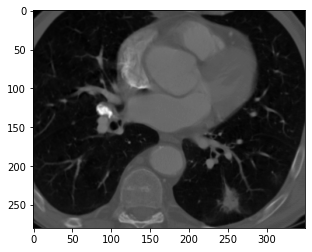

(280, 350)


In [3]:
mu = np.array([-987, -810, -540, -370, -160, 0, 100, 240, 340])
img = np.load(f'''../resources/luna_cropped.npy''')
plt.imshow(img, cmap='gray')
plt.show()
print(img.shape)

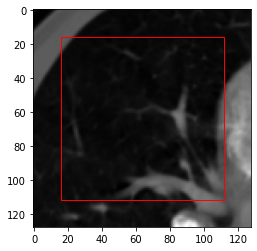

In [4]:
import matplotlib.patches as patches
fig1, ax1 = plt.subplots(1)
img = img[0:128, 0:128]
ax1.imshow(img, cmap='gray')
rect = patches.Rectangle((16,16),96,96,linewidth=1,edgecolor='r',facecolor='none')
ax1.add_patch(rect)
plt.show()

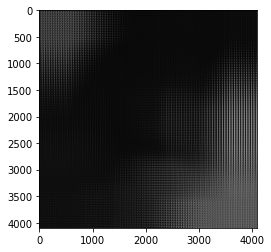

/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm.py:10: RuntimeWarning: invalid value encountered in log
  alpha_optimizer = lambda alpha_var: right_hand_side - (np.log(alpha_var) - digamma(alpha_var))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


iteration: 1, error: 0.6432463806157344
iteration: 2, error: 9.631389979090492e-15


/Users/mostafa/PycharmProjects/ncg/ct_charachterization/_first_algorithm.py:91: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  theta_before_expansion = np.array([initial_pi, initial_alpha, initial_beta])


iteration: 1, error: 0.43436538164148036
iteration: 2, error: 0.0021019023649631375
iteration: 3, error: 0.16644746203992228
iteration: 4, error: 0.0017491585530761554
iteration: 5, error: 0.15271611007696778
stable
smalled
(128, 128)


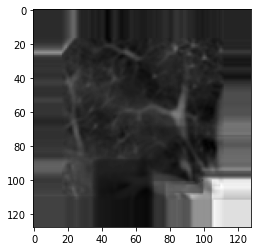

-971.8275080983285 -906.8162579999766 -680.0782914909443


In [5]:
y = img
big_y = expand(small_img=y, neighborhood_size=32)
plt.imshow(big_y, cmap='gray')
plt.show()
big_y_stab = run_third_algorithm(big_y, mu, non_central=True, constant_c=10, neighborhood_size=32, max_iter=5)
y_stab = np.empty(tuple(list(y.shape) + [len(mu)]), dtype=float)
for j in range(len(mu)):
    y_stab[..., j] = contract(big_img=big_y_stab[..., j], neighborhood_size=32)

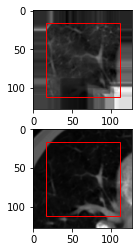

-971.8275080983285 -906.8162579999766 -680.0782914909443


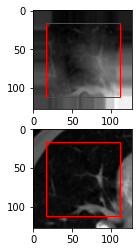

-912.2754494665619 -855.2598864598035 -683.6547126142996


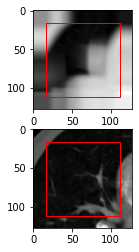

-911.5102129502632 -716.8781471595438 -478.00391727884903


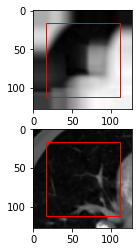

-912.9350053883151 -657.4346168655841 -338.9228206006246


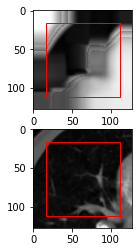

-898.0920508684908 -521.0685807137193 -46.63162415174486


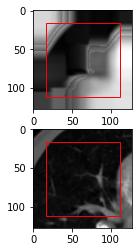

-897.3838031909534 -464.5188191458435 169.97611415383926


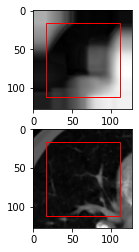

-907.8069633961106 -552.5847221054745 161.61727999203686


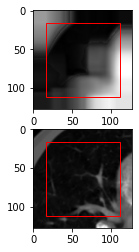

-907.6309085575463 -536.016313165033 283.6076893096297


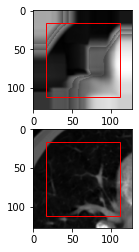

-896.4106885611976 -397.74464066804785 467.53107490161074


In [27]:
import matplotlib.patches as patches
img = img[0:128, 0:128]

for j in range(len(mu)):
    ys = y_stab[..., j]
    figs, axs = plt.subplots(2)
    axs[0].imshow(ys, cmap='gray')
    axs[1].imshow(img, cmap='gray')
    rect1 = patches.Rectangle((16,16),96,96,linewidth=1,edgecolor='r',facecolor='none')
    rect2 = patches.Rectangle((16,16),96,96,linewidth=1,edgecolor='r',facecolor='none')
    axs[0].add_patch(rect1)
    axs[1].add_patch(rect2)
    plt.show()
    print(np.min(ys) - 1030, np.mean(ys) - 1030, np.max(ys) - 1030)

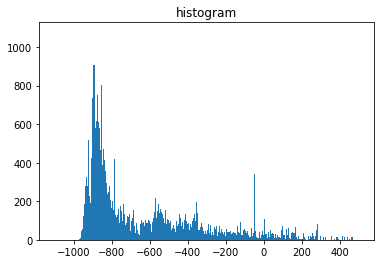

-971.8275080983285 -623.1468871425583 467.53107490161074


In [21]:
y_s_flat = y_stab.flatten() - 1030
ax = plt.subplot(1, 1, 1)
ax.hist(y_s_flat, bins=list(np.arange(-1100, 500, 1)))
plt.title("histogram")
plt.show()
print(np.min(y_s_flat), np.mean(y_s_flat), np.max(y_s_flat))

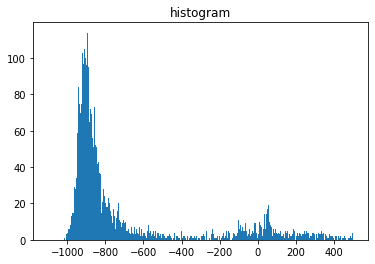

-1024 -638.679931640625 1971


In [22]:
y_flat = y.flatten()
ax = plt.subplot(1, 1, 1)
ax.hist(y_flat, bins=list(np.arange(-1100, 500, 1)))
plt.title("histogram")
plt.show()
print(np.min(y_flat), np.mean(y_flat), np.max(y_flat))